## 라이브러리 설치

In [8]:
!pip install pandas


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [9]:
!pip install numpy


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install matplotlib


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
!pip install seaborn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [61]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/7b/0e/25d6b5678ed3c7e12bc94d047d0e9492e89cc78b7ea0034ac0f1cf2ff304/scikit_learn-1.4.1.post1-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/9a/25/5b30cb3efc9566f0ebeaeca1976150316353c17031ad7868ef46de5ab8dc/scipy-1.12.0-cp311-cp311-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ---------------------------------------- 0.0/60.4 kB ? eta -:--:--
     ------ --------------------------------- 10.2/60.4 kB ? eta -:--:--
     ------------------- ------------------ 30.7/60.4 kB 435.7 kB/s eta 0:00:01
     -------------------------------------- 60.4/60.4 kB 456.4 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none

In [117]:
!pip install yellowbrick

  Obtaining dependency information for yellowbrick from https://files.pythonhosted.org/packages/06/35/c7d44bb541c06bc41b3239b27af79ea0ecc7dbb156ee1335576f99c58b91/yellowbrick-1.5-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   ---------------------------------------- 0.0/282.6 kB ? eta -:--:--
   - -------------------------------------- 10.2/282.6 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/282.6 kB 435.7 kB/s eta 0:00:01
   -------- ------------------------------ 61.4/282.6 kB 465.5 kB/s eta 0:00:01
   --------------- ---------------------- 112.6/282.6 kB 726.2 kB/s eta 0:00:01
   -------------------------- ----------- 194.6/282.6 kB 980.4 kB/s eta 0:00:01
   ---------------------------------------  276.5/282.6 kB 1.1 MB/s eta 0:00:01
   ---------------------------------------- 282.6/282.6 kB 1.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## 과제
- heart disease 데이터 분석하기
- 진행과정 : 데이터 전처리 -> 군집화 -> 군집화 기준 생각 -> 방향성 생각

### 데이터 처리

#### 결측값,이상값 처리

In [21]:
df_heart = pd.read_csv("project/heart_2020_cleaned.csv")
df_heart

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [31]:
# 결측치 확인 -> 없음
df_heart.isnull().sum()

HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [43]:
# 이상치 확인 (# BMI: BMI 수치, # PhysicalHealth, MentalHealth: 날짜, SleepTime : 수면시간)
df_heart.describe()

,BMI,PhysicalHealth,MentalHealth,SleepTime
count,319795.000000,319795.00000,319795.000000,319795.000000
mean,28.325399,3.37171,3.898366,7.097075
std,6.356100,7.95085,7.955235,1.436007
min,12.020000,0.00000,0.000000,1.000000
25%,24.030000,0.00000,0.000000,6.000000
50%,27.340000,0.00000,0.000000,7.000000
75%,31.420000,2.00000,3.000000,8.000000
max,94.850000,30.00000,30.000000,24.000000


In [51]:
# BMI 사분위수 범위 적용
Q1 = 24.030000
Q3 = 31.420000
IQR = Q3-Q1
print(Q1-IQR, Q3+IQR)

16.64 38.81


In [53]:
condition_bmi = "16.64 <= BMI <= 38.81"

In [58]:
df_heart_stable = df_heart.query(condition_bmi)
3#df_heart_stable

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,75-79,Black,No,No,Fair,12.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,18-24,Hispanic,No,Yes,Excellent,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No


#### 데이터 타입 변환 (label encoding, onehot encoding)

##### label encoding

In [109]:
# 데이터 프레임 타입 확인
df_heart_stable.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory           int64
Race                  int64
Diabetic              int64
PhysicalActivity     object
GenHealth             int64
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

In [110]:
# 레이블 인코딩을 수행할 컬럼들을 선택
columns_to_encode = ['AgeCategory', "Race", "Diabetic", "GenHealth"]

for column in columns_to_encode:
    df_heart_stable[column] = label_encoder.fit_transform(df_heart_stable[column])

# 변환된 데이터프레임 출력
df_heart_stable

C:\Users\슥츤이\AppData\Local\Temp\ipykernel_6408\3573989393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_stable[column] = label_encoder.fit_transform(df_heart_stable[column])
C:\Users\슥츤이\AppData\Local\Temp\ipykernel_6408\3573989393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heart_stable[column] = label_encoder.fit_transform(df_heart_stable[column])
C:\Users\슥츤이\AppData\Local\Temp\ipykernel_6408\3573989393.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a sl

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,12,5,0,Yes,4,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,9,5,2,Yes,1,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,11,5,0,No,2,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,4,5,0,Yes,4,8.0,No,No,No
5,Yes,28.87,Yes,No,No,6.0,0.0,Yes,Female,11,2,0,No,1,12.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319789,No,22.22,No,No,No,0.0,0.0,No,Female,0,3,0,Yes,0,8.0,No,No,No
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,8,3,2,No,1,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,3,3,0,Yes,4,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,5,3,0,Yes,2,6.0,No,No,No


In [102]:
df_heart_stable.dtypes

HeartDisease         object
BMI                 float64
Smoking              object
AlcoholDrinking      object
Stroke               object
PhysicalHealth      float64
MentalHealth        float64
DiffWalking          object
Sex                  object
AgeCategory           int64
Race                  int64
Diabetic              int32
PhysicalActivity     object
GenHealth             int32
SleepTime           float64
Asthma               object
KidneyDisease        object
SkinCancer           object
dtype: object

##### onehot encoding

In [103]:
# 원핫인코딩
# AgeCategory, Race, Diabetes, GenHealth ----> 를 레이블 인코딩 해야하는데 어떻게 할까?
df_heart_encoding = pd.get_dummies(df_heart_stable)
df_heart_encoding.dtypes

BMI                     float64
PhysicalHealth          float64
MentalHealth            float64
AgeCategory               int64
Race                      int64
Diabetic                  int32
GenHealth                 int32
SleepTime               float64
HeartDisease_No            bool
HeartDisease_Yes           bool
Smoking_No                 bool
Smoking_Yes                bool
AlcoholDrinking_No         bool
AlcoholDrinking_Yes        bool
Stroke_No                  bool
Stroke_Yes                 bool
DiffWalking_No             bool
DiffWalking_Yes            bool
Sex_Female                 bool
Sex_Male                   bool
PhysicalActivity_No        bool
PhysicalActivity_Yes       bool
Asthma_No                  bool
Asthma_Yes                 bool
KidneyDisease_No           bool
KidneyDisease_Yes          bool
SkinCancer_No              bool
SkinCancer_Yes             bool
dtype: object

### 비지도학습-군집화

#### KMeans 머신학습

In [62]:
from sklearn import datasets
from sklearn import cluster

In [111]:
kmeans_data = cluster.KMeans(n_clusters=4)
kmeans_data

KMeans(n_clusters=4)

In [112]:
kmeans_data.fit(df_heart_encoding) #문자열 오류

KMeans(n_clusters=4)

#### Elbow method 머신평가

In [122]:
# Elbow method(엘보우 기법)
# 군집 내 오차제곱합(SSE, sum of squared error)의 합을 군집화의 비용함수로 정의.
# 군집 수가 늘어날수록 비용함수는 감소함.
# 이때, 비용함수 감소 기울기가 급격히 줄어드는 부분(더이상 군집을 늘려도 크게 비용이 감소하지 않는 부분)을 최적의 군집수로 판단한다.
# KElbowVisualizer 라이브러리를 활용하여 손쉽게 계산 및 시각화를 할 수 있다.

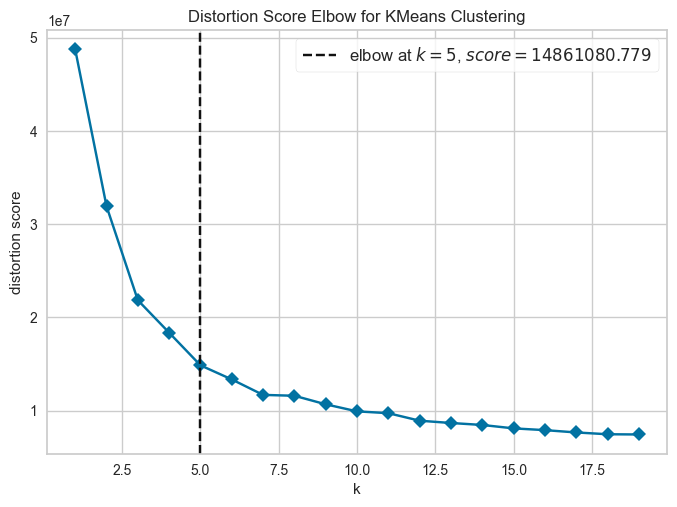

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [120]:
from yellowbrick.cluster import KElbowVisualizer

k=0
visualizer = KElbowVisualizer(kmeans_data, k=(1,20), timings=False)
visualizer.fit(df_heart_encoding)
visualizer.show()

In [121]:
# 즉 k = 5가 가장 적당함을 알 수 있음.